band - (train, test)
vv - (1.00, 0.99)
vh - ()
vhvv - ()

In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CropTypeDataset import *

sns.set_theme()
cmap = sns.color_palette("tab10", as_cmap=True)

In [2]:
keys = {
    0: 'NOT_CROP',
    1: 'B12',
    2: 'B14', 
    3: 'B15',  
    4: 'B54',
    5: 'B55'
}

### Loading MOMENT outputs

In [11]:
band = 'vh'
with open(f'./outputs/train_{band}_outputs.pkl', 'rb') as f:
    train_outputs = pkl.load(f)

with open(f'./outputs/test_{band}_outputs.pkl', 'rb') as f:
    test_outputs = pkl.load(f)
    
# Embeddings averaged across bands and patches
train_embeddings = train_outputs['embeddings'].mean(axis=1, keepdims=False)
train_labels = np.array([np.argmax(x) for x in train_outputs['labels']])
test_embeddings = test_outputs['embeddings'].mean(axis=1, keepdims=False)
test_labels = np.array([np.argmax(x) for x in test_outputs['labels']])

print(train_embeddings.shape, train_labels.shape)
print(test_embeddings.shape, test_labels.shape)

(2006, 1024) (2006,)
(502, 1024) (502,)


In [12]:
np.unique(test_labels, return_counts=True)

(array([0, 1, 2, 3, 5]), array([460,  14,   4,  15,   9]))

In [13]:
from momentfm.models.statistical_classifiers import fit_svm

clf = fit_svm(features=train_embeddings, y=train_labels)

y_pred_train = clf.predict(train_embeddings)
y_pred_test = clf.predict(test_embeddings)
train_accuracy = clf.score(train_embeddings, train_labels)
test_accuracy = clf.score(test_embeddings, test_labels)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

Train accuracy: 1.00
Test accuracy: 0.99


Text(0.5, 1.0, 'Classification Accuracy (vh)')

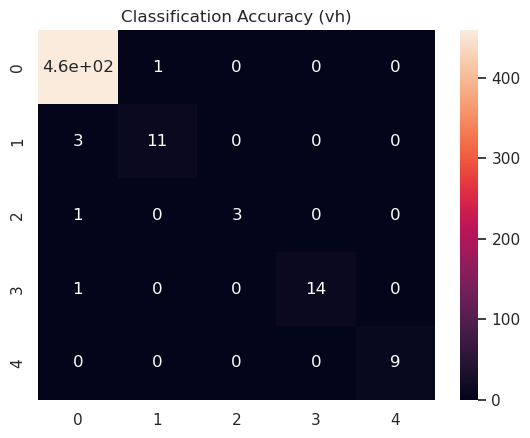

In [14]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(test_labels, y_pred_test)
sns.heatmap(cf_matrix, annot=True)
plt.title(f"Classification Accuracy ({band})")

In [8]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_test, target_names=['Not Crop', 'B12', 'B14', 'B15', 'B54', 'B55']))

              precision    recall  f1-score   support

    Not Crop       0.97      0.99      0.98       452
         B12       1.00      0.55      0.71        11
         B14       1.00      1.00      1.00         8
         B15       0.78      0.58      0.67        12
         B54       0.00      0.00      0.00         2
         B55       0.85      1.00      0.92        17

    accuracy                           0.97       502
   macro avg       0.77      0.69      0.71       502
weighted avg       0.96      0.97      0.96       502



/u/ayang1/.conda/envs/moment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/u/ayang1/.conda/envs/moment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/u/ayang1/.conda/envs/moment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

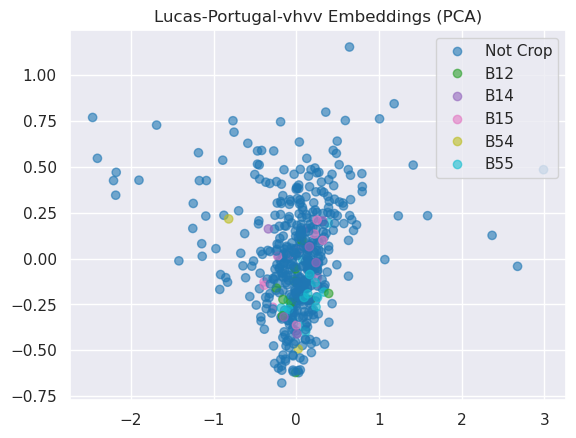

In [9]:
from sklearn.decomposition import PCA

test_embeddings_manifold = PCA(n_components=2).fit_transform(test_embeddings) 

plt.title(f"Lucas-Portugal-{band} Embeddings (PCA)")
fig = plt.scatter(
    test_embeddings_manifold[:, 0], 
    test_embeddings_manifold[:, 1],
    c=test_labels.squeeze(),
    cmap=cmap,
    alpha=0.6,
)
plt.legend(handles=fig.legend_elements()[0], labels=['Not Crop', 'B12', 'B14', 'B15', 'B54', 'B55'])
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4d84e7b920>
Traceback (most recent call last):
  File "/u/ayang1/.conda/envs/moment/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/u/ayang1/.conda/envs/moment/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/u/ayang1/.conda/envs/moment/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/u/ayang1/.conda/envs/moment/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'None

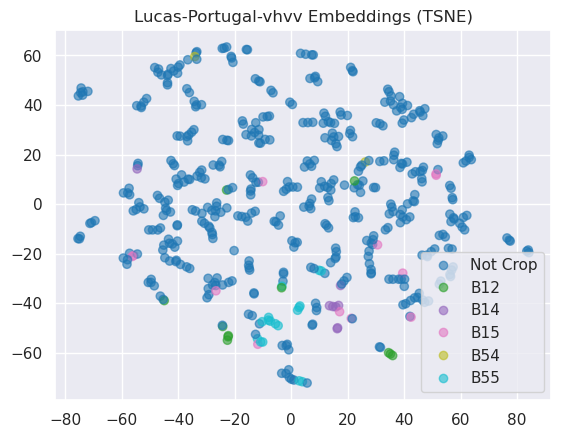

: 

In [10]:
import numpy as np
from sklearn.manifold import TSNE

test_embeddings_manifold = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(test_embeddings)

plt.title(f"Lucas-Portugal-{band} Embeddings (TSNE)")
plt.scatter(
    test_embeddings_manifold[:, 0], 
    test_embeddings_manifold[:, 1],
    c=test_labels.squeeze(),
    cmap=cmap,
    alpha=0.6,
)

plt.legend(handles=fig.legend_elements()[0], labels=['Not Crop', 'B12', 'B14', 'B15', 'B54', 'B55'])
plt.show()